In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

import warnings

In [2]:
dataframe=pd.read_csv('train.csv')
dftest=pd.read_csv('test.csv')
dataframe.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [3]:
dataframe.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [4]:
dftest.isnull().sum()

ID                         0
Agency                     0
Agency Type                0
Distribution Channel       0
Product Name               0
Duration                   0
Destination                0
Net Sales                  0
Commision (in value)       0
Gender                  9056
Age                        0
dtype: int64

In [5]:
dataframe['Gender'].fillna(dataframe['Gender'].mode()[0], inplace=True)
dataframe['Gender'].fillna(dataframe['Gender'].mode()[0], inplace=True)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dataframe['Gender'])

dataframe['Gender'] = le.transform(dataframe['Gender'])

le.fit(dataframe['Gender'])

dataframe['Gender'] = le.transform(dataframe['Gender'])

In [6]:
dftest['Gender'].fillna(dftest['Gender'].mode()[0], inplace=True)
dftest['Gender'].fillna(dftest['Gender'].mode()[0], inplace=True)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dftest['Gender'])

dftest['Gender'] = le.transform(dftest['Gender'])

le.fit(dftest['Gender'])

dftest['Gender'] = le.transform(dftest['Gender'])

In [7]:
dataframe_con = dataframe.select_dtypes(include=np.number)
dataframe_cat = dataframe.select_dtypes(exclude=np.number)

In [8]:
dftest_con = dftest.select_dtypes(include=np.number)
dftest_cat = dftest.select_dtypes(exclude=np.number)

In [9]:
for i in dataframe_cat:
    dataframe.groupby(i)['Claim'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,5))

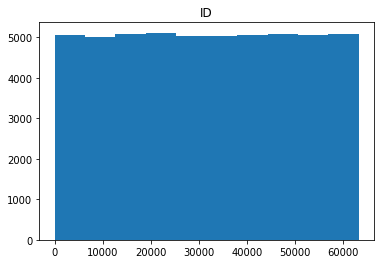

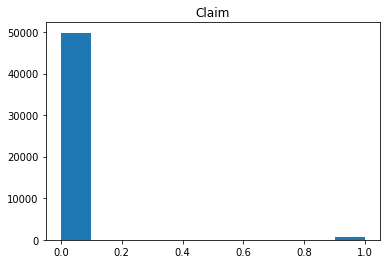

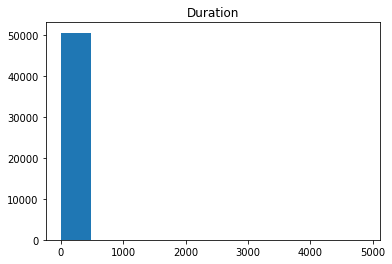

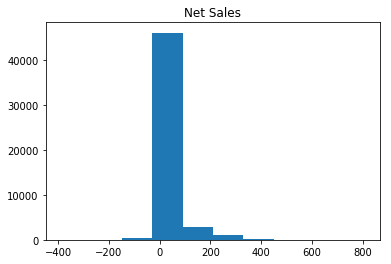

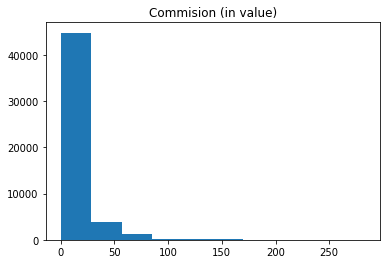

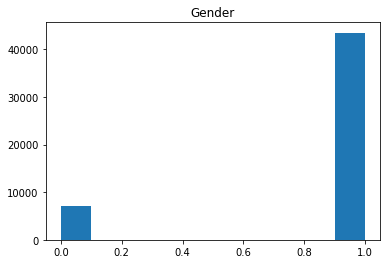

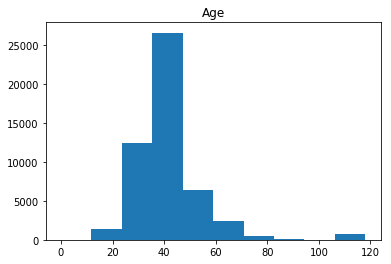

In [11]:

from matplotlib import pyplot as plt
for i in dataframe_con:
    plt.title(i)
    plt.hist(dataframe_con[i])
    plt.show()

In [12]:
dataframe_con.drop(['Duration'],1,inplace=True)

C:\Users\Akshatha\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
dftest_con.drop(['Duration'],1,inplace=True)

In [14]:

skewness = pd.DataFrame(data={'name':list(dataframe_con),'skew':skew(dataframe_con)})
skewness

,name,skew
0,ID,0.000141
1,Claim,8.076976
2,Net Sales,3.328144
3,Commision (in value),4.078068
4,Gender,-2.076052
5,Age,2.978390


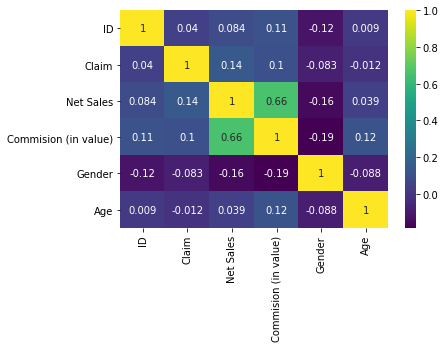

In [16]:
import seaborn as sns
sns.heatmap(dataframe_con.corr(),cmap='viridis',annot=True)

In [17]:
le = LabelEncoder()
for col in dataframe_cat:
    dataframe_cat[col] = le.fit_transform(dataframe_cat[col])
     

dataframe_cat.head()

C:\Users\Akshatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,6,1,1,16,56
1,7,1,1,10,79
2,6,1,1,16,56
3,7,1,1,1,38
4,7,1,1,10,47


In [18]:
le = LabelEncoder()
for col in dftest_cat:
    dftest_cat[col] = le.fit_transform(dftest_cat[col])
     

dftest_cat.head()

C:\Users\Akshatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,6,1,1,16,36
1,7,1,1,1,79
2,7,1,1,1,100
3,7,1,1,1,17
4,7,1,1,10,79


In [19]:
dftest_con.columns

Index(['ID', 'Net Sales', 'Commision (in value)', 'Gender', 'Age'], dtype='object')

In [20]:
new_dataframe = pd.concat([dataframe_con,dataframe_cat],axis=1,ignore_index=True)

In [21]:
new_dftest = pd.concat([dftest_con,dftest_cat],axis=1,ignore_index=True)

In [22]:
new_dataframe.columns=['ID', 'Claim', 'Net Sales', 'Commision (in value)', 'Gender', 'Age','Agency', 'Agency Type', 'Distribution Channel', 'Product Name','Destination']

In [23]:
new_dftest.columns=['ID','Net Sales', 'Commision (in value)', 'Gender', 'Age','Agency', 'Agency Type', 'Distribution Channel', 'Product Name','Destination']

In [40]:
new_dftest.head()

,ID,Net Sales,Commision (in value),Gender,Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,25902,49.5,29.7,1,47,6,1,1,16,36
1,19535,20.0,0.0,1,24,7,1,1,1,79
2,43717,20.0,0.0,1,36,7,1,1,1,100
3,48271,28.0,0.0,1,36,7,1,1,1,17
4,52318,11.0,0.0,1,36,7,1,1,10,79


In [25]:

X = new_dataframe.drop('Claim',1)
y = new_dataframe['Claim']
Xt=new_dftest.iloc[:,:10]

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Xt=scaler.fit_transform(Xt)

In [39]:
#X = pd.DataFrame(X,columns=columns[:-1])

In [28]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [30]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)
newX_train=pca.transform(X_train)
newX_test=pca.transform(X_test)




In [38]:

clf = LogisticRegression().fit(newX_train, y_train)

Y_test_pred = clf.predict(newX_test)

print("Accuracy = " , accuracy_score(y_test, Y_test_pred))
print("Precision = " ,precision_score(y_test, Y_test_pred))
print("Recall = " ,recall_score(y_test, Y_test_pred))
print("F1 Score = " ,f1_score(y_test, Y_test_pred))


C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy =  0.9843734546533478
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
dt = DecisionTreeClassifier(random_state =42,max_depth=3)

# Fit the model on train data
dt.fit(newX_train,y_train)

# accuracy
accuracy = dt.score(newX_test,y_test)

# Predicted values for test data
y_pred_dt = dt.predict(newX_test)

# ROC score
roc_score = roc_auc_score(y_test,y_pred_dt)
print('AUC_ROC_score is ',roc_score)
print('Accuracy score is ',accuracy_score(y_test,y_pred_dt))
print("Precision = " ,precision_score(y_test, y_pred_dt))
print("Recall = " ,recall_score(y_test, y_pred_dt))
print("F1 Score = " ,f1_score(y_test, y_pred_dt))

print(classification_report(y_test,y_pred_dt))

AUC_ROC_score is  0.5
Accuracy score is  0.9843734546533478
Precision =  0.0
Recall =  0.0
F1 Score =  0.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9953
           1       0.00      0.00      0.00       158

    accuracy                           0.98     10111
   macro avg       0.49      0.50      0.50     10111
weighted avg       0.97      0.98      0.98     10111



C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\

In [33]:
from mlxtend.classifier import StackingClassifier

classifier1 = LogisticRegression(C=0.1)
classifier2= DecisionTreeClassifier(random_state=2,criterion='entropy',max_depth=4)

classifier_list=[classifier1,classifier2]

m_classifier=DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=6)



sclf = StackingClassifier(classifiers=classifier_list, 
                          meta_classifier=m_classifier)

sclf.fit(newX_train,y_train)

y_pred_sclf = sclf.predict(newX_test)


s_score=sclf.score(newX_test,y_test)
print("Test score: %.2f " % s_score)
roc_score = roc_auc_score(y_test,y_pred_sclf)
print('AUC_ROC_score is ',roc_score)
print('Accuracy score is ',accuracy_score(y_test,y_pred_sclf))
print("Precision = " ,precision_score(y_test, y_pred_sclf))
print("Recall = " ,recall_score(y_test, y_pred_sclf))
print("F1 Score = " ,f1_score(y_test, y_pred_sclf))

print(classification_report(y_test,y_pred_sclf))

C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test score: 0.98 
AUC_ROC_score is  0.49994976389028434
Accuracy score is  0.9842745524676095
Precision =  0.0
Recall =  0.0
F1 Score =  0.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9953
           1       0.00      0.00      0.00       158

    accuracy                           0.98     10111
   macro avg       0.49      0.50      0.50     10111
weighted avg       0.97      0.98      0.98     10111



In [34]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(criterion='gini', max_depth= 6,
max_features= 'auto',
n_estimators= 11)


rfc.fit(newX_train,y_train)


y_pred_rf = rfc.predict(newX_test)


accuracy = rfc.score(newX_test,y_test)


roc_score = roc_auc_score(y_test,y_pred_rf)

print('AUC_ROC score is ',roc_score)
print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print("Precision = " ,precision_score(y_test, y_pred_rf))
print("Recall = " ,recall_score(y_test, y_pred_rf))
print("F1 Score = " ,f1_score(y_test, y_pred_rf))

print(classification_report(y_test,y_pred_rf))

AUC_ROC score is  0.5
Accuracy is  0.9843734546533478
Precision =  0.0
Recall =  0.0
F1 Score =  0.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9953
           1       0.00      0.00      0.00       158

    accuracy                           0.98     10111
   macro avg       0.49      0.50      0.50     10111
weighted avg       0.97      0.98      0.98     10111



C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\

In [35]:
rfc = RandomForestClassifier(random_state=2)
param_grid = { 
'n_estimators': [11,12,13],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
}
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
grid_search_model.fit(newX_train, y_train)

grid_search_model.best_params_

C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 11}

In [36]:
rfc = RandomForestClassifier(criterion='gini', max_depth= 4,
max_features= 'auto',
n_estimators= 11)

# Fit the model
rfc.fit(newX_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(newX_test)

# accuracy
accuracy = rfc.score(newX_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred_rf)
print('AUC_ROC score is ',roc_score)
print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print("Precision = " ,precision_score(y_test, y_pred_rf))
print("Recall = " ,recall_score(y_test, y_pred_rf))
print("F1 Score = " ,f1_score(y_test, y_pred_rf))

print(classification_report(y_test,y_pred_rf))

AUC_ROC score is  0.5
Accuracy is  0.9843734546533478
Precision =  0.0
Recall =  0.0
F1 Score =  0.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9953
           1       0.00      0.00      0.00       158

    accuracy                           0.98     10111
   macro avg       0.49      0.50      0.50     10111
weighted avg       0.97      0.98      0.98     10111



C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Akshatha\Anaconda3\lib\

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(n_estimators=11, max_depth=4, random_state=0)
gb.fit(newX_train, y_train)

y_pred_gb = gb.predict(newX_test)

# accuracy
accuracy = gb.score(newX_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred_gb)
print('AUC_ROC score is ',roc_score)
print('Accuracy is ', accuracy_score(y_test,y_pred_gb))
print("Precision = " ,precision_score(y_test, y_pred_gb))
print("Recall = " ,recall_score(y_test, y_pred_gb))
print("F1 Score = " ,f1_score(y_test, y_pred_gb))

print(classification_report(y_test,y_pred_gb))

AUC_ROC score is  0.5056258083880314
Accuracy is  0.9831866284244882
Precision =  0.125
Recall =  0.012658227848101266
F1 Score =  0.022988505747126433
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9953
           1       0.12      0.01      0.02       158

    accuracy                           0.98     10111
   macro avg       0.55      0.51      0.51     10111
weighted avg       0.97      0.98      0.98     10111



In [41]:


y_pred_gb = gb.predict(new_dftest)

In [42]:
output = pd.DataFrame({'ID':new_dftest['ID'],'Claim':y_pred_gb})

In [43]:
output.head()

,ID,Claim
0,25902,1
1,19535,1
2,43717,1
3,48271,1
4,52318,1


In [44]:
output.to_csv(path_or_buf = r'C:\Users\Akshatha\Downloads\geeks_submit.csv',index=False)